<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº0 - Hola mundo version APS
#### Nombre y Apellido: Catalina Gonzalez Araujo


# *Introducción*
Jupyter Notebook es una herramienta para la confección de reportes técnicos, dado que permite la interacción en el mismo ambiente de: 
1. un procesador de texto elemental (formato Markdown) que permite resaltar texto, en forma de *itálica* o **negrita** de manera muy legible (haciendo doble click en este texto podrás ver el código fuente estilo Markdown). Cuenta con estilos predefinidos:

## $ Título 1 $ 

### <font color=red>Título 2</font> 

y también la capacidad de incluir enlaces a otras páginas, como por ejemplo [esta página](https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed) donde encontrarás más funcionalidades del lenguaje **Markdown**

2. capacidad para incluir lenguaje matemático estilo LaTex, tanto de forma presentada

\begin{equation}
X(n) = \sum_{k=-\infty}^{\infty} X(n)\cdot \delta(n - k)
\end{equation}

como *inline* en el propio párrafo $f(x) = \frac{\sin(x)}{x} $

3. La posibilidad de incluir scripts en Python, como los que usaremos para las simulaciones en los TPs de la materia. En este caso usaremos el *testbench0.py* como ejemplo. Una vez que lo probamos y estamos seguros que funciona de forma esperada en *Spyder*, podemos incluir los resultados de la simulación de manera casi transparente. Solo tenemos que agregar una celda de código donde incluimos el código, y los resultados directamente quedan incluidos en este documento.

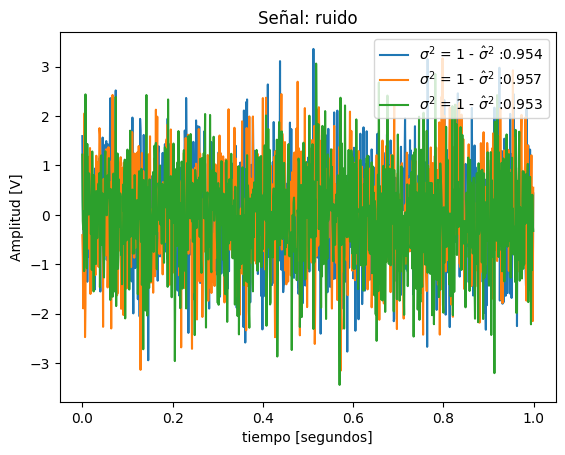

In [13]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on ...

@author: ...

Descripción:
------------

Cada TP podrías estructurarlo mediante funciones definidas en "testbenchs" o 
archivos de prueba como este. Te pueden servir para ordenar tu trabajo y para 
poder pasar fácilmente a un jupyter notebook una vez que tengas bien probadas 
las funciones que necesites para responder cada punto del TP.

Recordá que en "pdsmodulos" podés incluir todas las funciones más generales
que te resulten útiles y reutilizarlas.

"""

# Ejemplificaremos el uso de las herramientas que utilizaremoos frecuentemente 

# Importación de módulos que utilizaremos en nuesto testbench:
# Una vez invocadas estas funciones, podremos utilizar los módulos a través del identificador que indicamos luego de "as". 
# Por ejemplo np.linspace() -> función linspace dentro e NumPy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pdsmodulos as pds


###################################
## Formas de incluir comentarios ##
###################################

# Comentarios con "#"

""" Bloques de comentario
    bla bla bla
    bla ...
"""

#%% Separación de bloques de código para ordenar tu trabajo "#%%"

#%%  Inicialización

#%%  Generación de señales de prueba

#%%  Presentación de resultados


#%%  Testbench: creamos una función que no recibe argumentos para asegurar que siempre encontraremos nuestro espacio de variables limpio.
# Prestar atención al indentado, ya que Python interpreta en función del indentado !!

def my_testbench( sig_type ):
    
    # Datos generales de la simulación
    fs = 1000.0 # frecuencia de muestreo (Hz)
    N = 1000   # cantidad de muestras
    
    ts = 1/fs # tiempo de muestreo
    df = fs/N # resolución espectral
    
    # grilla de sampleo temporal
    tt = np.linspace(0, (N-1)*ts, N).flatten()
    
    # grilla de sampleo frecuencial
    ff = np.linspace(0, (N-1)*df, N).flatten()

    # Concatenación de matrices:
    # guardaremos las señales creadas al ir poblando la siguiente matriz vacía
    x = np.array([], dtype=float).reshape(N,0)
    ii = 0
    
    # estructuras de control de flujo
    if sig_type['tipo'] == 'senoidal':
    
        
        # calculo cada senoidal de acuerdo a sus parámetros
        for this_freq in sig_type['frecuencia']:
            # prestar atención que las tuplas dentro de los diccionarios también pueden direccionarse mediante "ii"
            aux = sig_type['amplitud'][ii] * np.sin( 2*np.pi*this_freq*tt + sig_type['fase'][ii] )
            # para concatenar horizontalmente es necesario cuidar que tengan iguales FILAS
            x = np.hstack([x, aux.reshape(N,1)] )
            ii += 1
    
    elif sig_type['tipo'] == 'ruido':
        
        # calculo cada señal de ruido incorrelado (blanco), Gausiano de acuerdo a sus parámetros
        # de varianza
        for this_var in sig_type['varianza']:
            aux = np.sqrt(this_var) * np.random.randn(N,1)
            # para concatenar horizontalmente es necesario cuidar que tengan iguales FILAS
            x = np.hstack([x, aux] )
        
        # Podemos agregar algún dato extra a la descripción de forma programática
        # {0:.3f} significa 0: primer argunmento de format
        # .3f formato flotante, con 3 decimales
        # $ ... $ indicamos que incluiremos sintaxis LaTex: $\\\hat{{\sigma}}^2$
        sig_props['descripcion'] = [ sig_props['descripcion'][ii] + ' - $\\hat{{\\sigma}}^2$ :{0:.3f}'.format( np.var(x[:,ii]))  for ii in range(0,len(sig_props['descripcion'])) ]
    
    else:
        
        print("Tipo de señal no implementado.")        
        return
        
    #%% Presentación gráfica de los resultados
    
    plt.figure(1)
    line_hdls = plt.plot(tt, x)
    plt.title('Señal: ' + sig_type['tipo'] )
    plt.xlabel('tiempo [segundos]')
    plt.ylabel('Amplitud [V]')
    #    plt.grid(which='both', axis='both')
    
    # presentar una leyenda para cada tipo de señal
    axes_hdl = plt.gca()
    
    # este tipo de sintaxis es *MUY* de Python
    axes_hdl.legend(line_hdls, sig_type['descripcion'], loc='upper right'  )
    
    plt.show()

    
        
# Uso de diferentes tipos de datos en Python            

## tipo de variable diccionario. Puedo crearlo iniciándolo mediante CONSTANTES

#sig_props = { 'tipo': 'senoidal', 
#              'frecuencia': (3, 6, 9), # Uso de tuplas para las frecuencias 
#              'amplitud':   (1, 1,  1),
#              'fase':       (0, 0,  0)
#             } 
# # Como también puedo agregar un campo descripción de manera programática
# # este tipo de sintaxis es *MUY* de Python
# sig_props['descripcion'] = [ str(a_freq) + ' Hz' for a_freq in sig_props['frecuencia'] ]

# Usar CTRL+1 para comentar o descomentar el bloque de abajo.
sig_props = { 'tipo': 'ruido', 
              'varianza': (1, 1, 1) # Uso de tuplas para las frecuencias 
             } 
sig_props['descripcion'] = [ '$\\sigma^2$ = ' + str(a_var) for a_var in sig_props['varianza'] ]
    
# Invocamos a nuestro testbench exclusivamente: 
my_testbench( sig_props )
    



## A partir de acá ...

Ahora podés volver a intercalar texto libremente, por ejemplo para explicar que el bloque anterior se encarga de cargar funciones y módulos y que lo podés hacer solamente una vez al principio, o donde lo necesites. A partir de acá podés intercalar tu código o tantas celdas de texto como necesites. Por ejemplo, comenzaremos con un manuscrito escaneado, donde por ejemplo, podrías incluir la resolución de un problema que se te pida en clase:


In [14]:
from IPython.display import IFrame
IFrame("./lapiz_y_papel.pdf", width=1000, height=1000)


## Retomando el código

Dado que nuestro *testbench* ha sido desarrollado de manera funcional, llamando a la función *my_testbench()* con diferentes parámetros, podemos lograr funcionalidades diferentes, como mostramos a continuación primero con una senoidal:

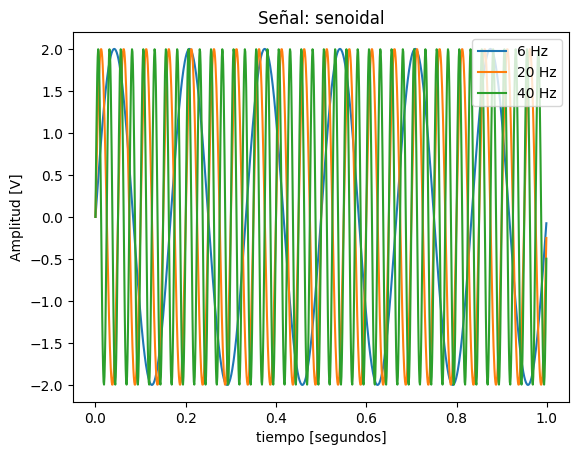

In [15]:
sig_props = { 'tipo': 'senoidal', 
              'frecuencia': (6, 20, 40), # Cambie las frecuencias al doble
              'amplitud':   (2, 2,  2), # Tambien modifique las amplitudes
              'fase':       (0, 0,  0)
             } 
# Como también puedo agregar un campo descripción de manera programática
# este tipo de sintaxis es *MUY* de Python
sig_props['descripcion'] = [ str(a_freq) + ' Hz' for a_freq in sig_props['frecuencia'] ]
    
# Invocamos a nuestro testbench exclusivamente: 
my_testbench( sig_props )

Y ahora con una señal aleatoria, en este caso ruido blanco Gaussiano incorrelado de varianza $\sigma^2$:

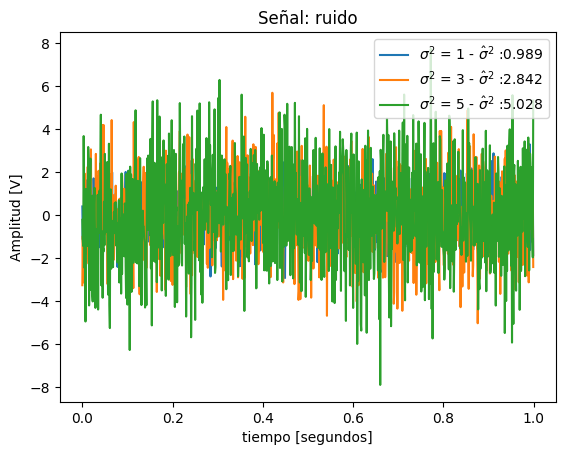

In [16]:
# Usar CTRL+1 para comentar o descomentar el bloque de abajo.
sig_props = { 'tipo': 'ruido', 
              'varianza': (1, 3, 5) # Modifique los valores de la varianza para ver mayor dispersion 
             } 
sig_props['descripcion'] = [ '$\\sigma^2$ = ' + str(a_var) for a_var in sig_props['varianza'] ]
    
# Invocamos a nuestro testbench exclusivamente: 
my_testbench( sig_props )


Como puede verse en la figura anterior, al samplear una distribución estadística de media nula y varianza $\sigma^2=1$, obtenemos realizaciones cuyo parámetro $\sigma^2$ estimado, es decir $\hat\sigma^2$, tienen una desviación respecto al verdadero valor (sesgo). Nos ocuparemos de estudiar el sesgo y la varianza de algunos estimadores cuando veamos **Estimación Espectral**.

# *Conclusion final*

A continuacion te cuento como modifique el notebook: 
- Le agregue un nombre al Trabajo Práctico Nº0
- Modifique la introduccion, cambiando la ecuacion dada, agregandole texto, y acomodandola para que se vea mas prolijo a mi gusto
- Cambie las frecuencias de la señal senoidal
- Cambie las amplitudes para observar diferencias en los graficos
- Modifique la varianza en el ruido blanco Gaussiano para observar mayor dispersion
- Practique como quitar, agregar, modificar y mover celtas
- Y por ultimo aprendi como agregar comenarios en los codigos y a usar *Markdown*

Esto representa mi primer notebook, y fue muy util para terminar de comprender, y poder familiarizarme con lo visto en clase.

## **Esta es mi propia version del Hola mundo APS!**